 # ESTADÍSTICA 2.  PRÁCTICA 7.
 ## Autor: Jesús Octavio Raboso.
 
Los enunciados del ejercicio aparecerán en negrita, cursiva y color azul. El resto de anotaciones (explicativas y personales) no seguirán ese estilo.

In [1]:
# Load require packages
if (!require("pryr")) install.packages("pryr")
if (!require("gridGraphics")) install.packages("gridGraphics")
if (!require("grid")) install.packages("grid")
if (!require("UsingR")) install.packages("UsingR")
if (!require("lattice")) install.packages("lattice")
if (!require("gridExtra")) install.packages("gridExtra")

Loading required package: pryr
Warning message:
"package 'pryr' was built under R version 3.6.3"Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp
Loading required package: gridGraphics
Warning message:
"package 'gridGraphics' was built under R version 3.6.3"Loading required package: grid
Loading required package: UsingR
Warning message:
"package 'UsingR' was built under R version 3.6.3"Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.6.3"Loading required package: HistData
Warning message:
"package 'HistData' was built under R version 3.6.3"Loading required package: Hmisc
Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Warning message:
"package 'Formula' was b

package 'UsingR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\usuario\AppData\Local\Temp\RtmpIHZrYO\downloaded_packages


Loading required package: gridExtra
Warning message:
"package 'gridExtra' was built under R version 3.6.3"

<font color='blue'>***1.- Escribe una función que tenga como input un vector x con valores distribuidos uniformemente, y unos parámetros a, b, m y n; y que devuelva como output una matriz cuya primera columna sea y = a + b x más un término estocástico sacado de una gaussiana con sigma = c + d*x^2; y la segunda columna el error sigma = m + n*x^2.***</font>

Dada una muestra de tamaño $N$, buscamos un modelo con $M$ parámetros tal que:
$$ \boldsymbol{y}^{T} = X\boldsymbol{\theta}^{T} $$
siendo $\boldsymbol{y} = [y_{1}, y_{2},...,y_{N}]$ el vector con los valores estimados, $\boldsymbol{\theta} = [\theta_{0}, \theta_{1},...,\theta_{M-1}]$ el vector de parámetros y 
$$X =\begin{bmatrix} 
	1 & x_{1} & x_{1}^{2} & \dots & x_{N}^{M-1} \\
	1 & x_{2} & x_{2}^{2} & \dots & x_{N}^{M-1} \\
    \vdots & \vdots       & \vdots &  \vdots& \vdots  \\
	1 & x_{N} & x_{N}^{2} & \dots & x_{N}^{M-1} \\
	\end{bmatrix}
$$
la matriz elaborada a partir del vector observado $\boldsymbol{x} = [x_{1}, x_{2},...,x_{N}]$. Es decir:


$$\begin{bmatrix}
y_{1} \\ y_{2} \\ \vdots \\ y_{N}
\end{bmatrix} = 
\begin{bmatrix} 
	1 & x_{1} & x_{1}^{2} & \dots & x_{N}^{M-1} \\
	1 & x_{2} & x_{2}^{2} & \dots & x_{N}^{M-1} \\
    \vdots & \vdots       & \vdots &  \vdots& \vdots  \\
	1 & x_{N} & x_{N}^{2} & \dots & x_{N}^{M-1} \\
	\end{bmatrix}
    \begin{bmatrix} 
	\theta_{0}\\
	\theta_{1}\\
    \vdots \\
    \theta_{M-1}\\
	\end{bmatrix}.
$$



La probabilidad estará dada por la gaussiana:
$$ p(y_{i}|x_{i}) = \prod_{i}\frac{1}{\sigma_{i}\sqrt{2\pi}}e^{-\frac{1}{2}
\frac{(y_{i}-\boldsymbol{x}_{i}{\boldsymbol{\theta})^{2}}}{\sigma{i}^{2}}}$$
donde $\boldsymbol{\sigma} = [\sigma_{1}, \sigma_{2}, ... ,\sigma_{N}]$, 
$\boldsymbol{x}_{i} = [x_{i}^{0}, x_{i}^{1}, ..., x_{i}^{M-1}]$.

De este modo, la función de verosimilitud estrá dada por:
$$ L((x_{i}, y_{i}); \theta) = \prod_{i} p(y_{i}|x_{i}).$$


En las siguientes funciones, definimos modelos $\boldsymbol{y}^{T} = X\boldsymbol{\theta}^{T}$. El de `dist_1` es lineal y el de `dist_2` cuadrático.


**La siguiente función coincide con la requerida en el ejercicio 6:**

In [2]:
dist_1 <- function(x, a, b, m, n){
    
    #
    # Given a random uniformly distributed vector x and parameters a, b, generates linear model
    # y = a*x + b.
    # Given a random uniformly distributed vector x and parameters m, n, calculates 
    # sigma = m+n+x^2 for normal distribution with mean = 0.
    # Return independent term y=a+b*x+ gauss(0, sigma) and sigma.
    #
    # @description Creates distributon y=a+b*x+ gauss(0, sigma=m+n+x^2)
    # 
    #
    # @param x: float vector. Random uniformly distributed vector.
    # @param a: float. Parameter for linear model y = a + b*x.
    # @param b: float. Parameter for linear model y = a + b*x.
    # @param m: float. Parameter for sigma = m + n * x^2 
    # @param n: float. Parameter for sigma = m + n * x^2 
    #
    # @return : Given N=length(x), returns an Nx2 matrix whose first column is y=a+b*x+ gauss(0, sigma); whose
    # second column is m + n *x^2.
    # 
    
    sigma <- m + (n * (x ^ 2))
    normal <- rnorm(length(x), mean = 0, sd = sigma)
    y = a + (b * x) + normal    
    
    return(data.frame(y = y, sigma = sigma))
}

<font color='blue'>***2.- Escribe otra función que haga lo mismo que la anterior pero con un parámetro más “c” de tal forma que haga lo mismo pero con un modelo y = a + b x + c x^2.***</font>

In [3]:
dist_2 <- function(x, a, b, c, m, n){
    
    #
    # Given a random uniformly distributed vector x and paremeters a, b, generates quadratic model
    # y = a + bx + cx^2.
    # Given a random uniformly distributed vector x and parameters m, n, calculates 
    # sigma = m + n + x^2 for normal distribution with mean = 0.
    # Return independent term y= a + b*x + c*x^2 + gauss(0, sigma) and sigma.
    #
    # @description Creates distributon y= a + b*x + c*x^2 + gauss(0, sigma = m + n + x^2)
    # 
    #
    # @param x: float vector. Random uniformly distributed vector.
    # @param a: float. Parameter for quadratic model y =a + b*x + c*x^2 + gauss(0, sigma).
    # @param b: float. Parameter for quadratic model y =a + b*x + c*x^2 + gauss(0, sigma).
    # @param c: float. Parameter for quadratic model y =a + b*x + c*x^2 + gauss(0, sigma).
    # @param m: float. Parameter for sigma = m + n * x^2 
    # @param n: float. Parameter for sigma = m + n * x^2 
    #
    # @return : Given N=length(x), returns an Nx2 matrix whose first column is y=a+b*x+c*x^2+ gauss(0, sigma); whose
    # second column is m + n *x^2.
    # 
    
    sigma <- m + (n * (x ^ 2))
    normal <- rnorm(length(x), mean = 0, sd = sigma)
    y = a + (b * x) + (c * (x ^ 2)) + normal    
    
    return(data.frame(y = y, sigma = sigma))
}

<font color='blue'>***3.- Usando como valores a = 1, b = 2, m = 0.1 y n = 0.04 para el modelo de la primera función: calcula los parámetros para las que el likelihood es máximo asumiendo un modelo con dos parámetros y = a + b x. Calcula el valor del chi2 y calcula el nivel de confianza con el que rechazaríamos este ajuste.***</font>  

El **contraste de hipótesis**, en general, es la técnica estadística adecuada cuando se quiere estudiar si una determinada afirmación sobre una distribución poblacional es confirmada o invalidada por los datos de la muestra. 

Para realizar el contraste, se utiliza un **estadístico** de contraste cuya distribución en el muestreo se conoce si la hipótesis que hemos hecho es verdadera. Extraída la muestra, el estadístico tomará cierto valor. Algunos valores del estadístico pueden llevarnos a sospechar que la hipótesis no es razonable y no debemos aceptarla. Otros valores del estadístico pueden considerarse como justifiación de la hipótesis. Sin embargo, en ambos casos estamos sujetos a error: rechazar la hipótesis siendo verdadera; aceptarla siendo falsa. 

* **HIPÓTESIS NULA $H_{0}$.** Hipótesis que se desea contrastar. Se acepta o no como conclusión del contraste. 
* **HIPÓTESIS NULA $H_{1}$.** Hipótesis frente a $H_{0}$. Si se acepta $H_{0}$, se rechaza $H_{1}$. Si se acepta $H_{1}$, no se acepta $H_{0}$.
* **ESTADÍSTICO DE CONTRASTE.** Función de la muestra que aplica en $\mathbb{R}$.
* **REGIÓN DE ACEPTACIÓN.** Conjunto de valores del estadístico de contraste que llevan a aceptar la hipótesis nula.
* **REGIÓN CRÍTICA.** Conjunto de valores del estadístico de contraste que llevan a no aceptar la hipótesis nula.
* **NIVEL DE SIGNIFICACIÓN $\alpha$.** Probabilidad de no aceptar la hipótesis nula siendo correcta.
* **p-VALOR.** Mínimo nivel de significacion con el que puede no aceptarse la hipótesis nula. Hay qie aceptar l ahipótesis nula salvo si se está dispuesto a un riesgo de error igual o superior al p-valor.


El criterio de decisión es el siguiente:
* $p$-valor $< \alpha$ $\Rightarrow$ no aceptamos $H_{0}$
* $p$-valor $> \alpha$ $\Rightarrow$ sí aceptamos $H_{0}$



**La siguiente función coincide con la requerida en el ejercicio 6.**

In [4]:
opt_likelihood <- function(X, y, sigma){
    
    
    #
    # @description Optimize likelihooh function
    #
    # @param X: float matrix. Features matrix including 1s vector.
    # @param y: float vector. Model y = a + b*x+ gauss(0, sigma=m+n+x^2)
    # @param sigma: floar vector. sigma=m+n+x^2
    #
    # @return float vector. Vector with coefficients that maximize likelihoob
    # function. 
    #
    
    cov_inv <- solve(diag(sigma^2))
    return(solve(t(X) %*% cov_inv %*% X) %*% (t(X) %*% cov_inv) %*% y)
}

### Creamos unos datos que siguen una regla lineal. Aproximamos con un modelo lineal de dos parámetros.

In [5]:
# Number of elements. Sample size
N <- 100

In [6]:
# Create random uniformly distributed vector with N elements between 0 and 10
# Seed to ensure reproducible results
set.seed(100)
x.linear <- runif(n = N, min = 0, max = 10)

In [7]:
# Set feature matrix X (with 1's vector)
# Matrix for approximation with two parameters, ie, length(theta) = 2, where
# theta is the vector that contains the parameters.
X.linear.2.params <- cbind(1, x.linear)

In [8]:
# Set parameters
a.linear <- 1
b.linear <- 2
m.linear <- 0.1
n.linear <- 0.04

# Invoke function to create model
my.dist <- dist_1(x = x.linear,
                  a = a.linear,
                  b = b.linear, 
                  m = m.linear,
                  n = n.linear)

In [9]:
# Set sigma
sigma.linear <- my.dist$sigma

In [10]:
# Set y
y.linear <- my.dist$y

In [11]:
# Calculate \hat{\theta}, ie, parameters that optimize the likelihood function
theta.hat.linear.2.params <- opt_likelihood(X = X.linear.2.params,
                                            y = y.linear,
                                            sigma = sigma.linear)

In [12]:
# Display theta
print("Parámetros que optimizan la función de likelihood:")
theta.hat.linear.2.params

[1] "Parámetros que optimizan la función de likelihood:"


,1.090950
x.linear,1.940837


In [13]:
# Compute predicted y values
y.hat.linear.2.params <- X.linear.2.params %*% theta.hat.linear.2.params

En nuestro caso (ver teoría) el estadísco que emplearemos es:
$$\chi^{2}=\sum_{i=1}^{N}\frac{(y_{i}-\boldsymbol{x}_{i}\boldsymbol{\theta}^{T})^{2}}{\sigma_{i}^{2}} = \sum_{i=1}^{N}z_{i}^{2}.$$

Llamaremos a dicha cantidad *chi-cuadrado*. Su pdf es conocida. Sus grados de libertad son:
$$ k = N- M$$
donde $N$ es el tamaño muestrla y $M$ el número de parámetros.

In [14]:
# Compute observed chi^2
chi.linear.2.params <- sum(((y.linear - y.hat.linear.2.params) / sigma.linear) ^ 2)
print(paste('Valor observado de chi-cuadrado:', chi.linear.2.params))

[1] "Valor observado de chi-cuadrado: 97.5388837808812"


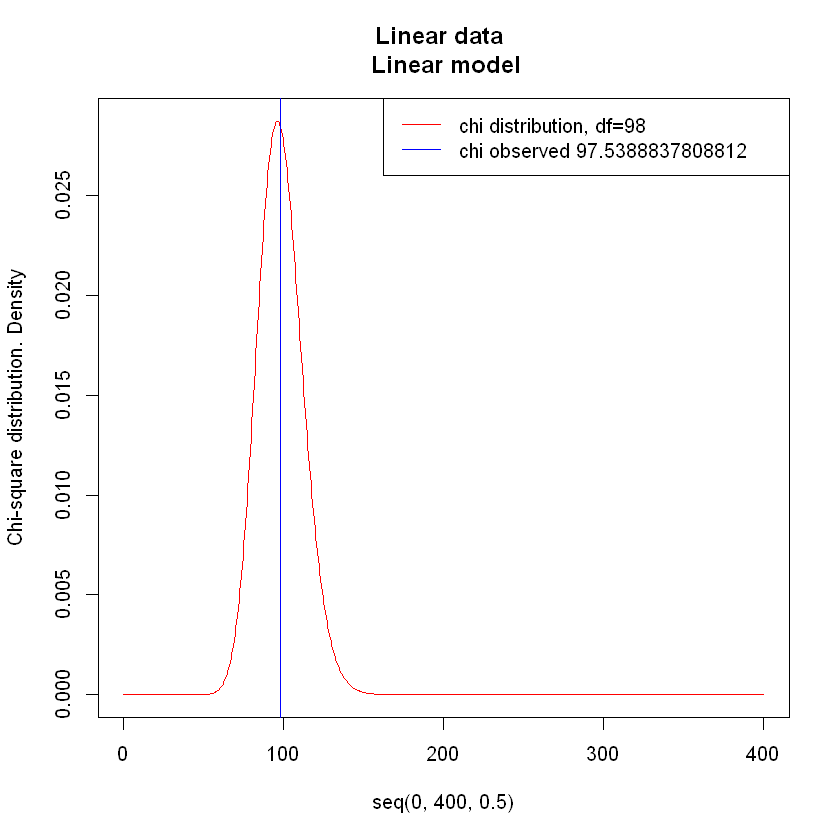

In [15]:
plot(seq(0, 400, 0.5), 
     dchisq(seq(0, 400, 0.5),  N - length(theta.hat.linear.2.params)),
     type = "l",
     col = "red",
     ylab = 'Chi-square distribution. Density',
     main = paste("Linear data", "\n", "Linear model"))

abline(v = chi.linear.2.params, col = "blue")

legend("topright", 
        legend = c(paste0("chi distribution, df=", N - length(theta.hat.linear.2.params)), 
                   paste('chi observed', chi.linear.2.params)),
        col = c("red", "blue"),
        lty = 1, 
        cex = 1)

# Save picture
linear.data.linear.model <- recordPlot()

Nos preguntamos: *¿a partir de qué chi-cuadrado es bueno el ajuste?*, *¿cuál es la probabilidad de obtener un valor de chi-cuadrado como el observado o mayor?*

Hallamos el p-valor denotado por $p$ como:
$$ p = P(\chi^{2} \geq \chi_{obs}^{2}) = \int_{\chi^{2}_{obs}}^{+\infty}pdf(\chi^{2})d\chi^{2}$$
donde $\chi^{2}_{obs}$ es el valor observado del estadístico.

In [16]:
# Compute p-value
# pchisq: cumulative distributed function
#    df : degrees of freedom
p.linear.2.params <- 1 - pchisq(chi.linear.2.params, 
                                df = N - length(theta.hat.linear.2.params))
print(paste('p-valor observado:', p.linear.2.params))

[1] "p-valor observado: 0.49414684939719"


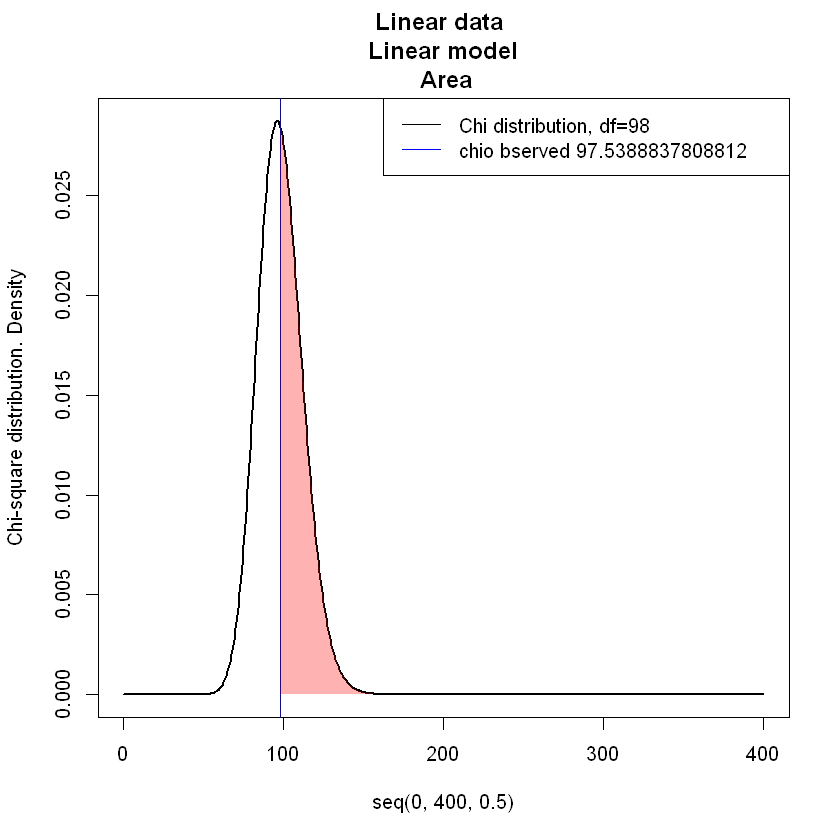

In [17]:
# Create vector of x values
x <- seq(0, 400, 0.5)

#create density curve
plot(seq(0, 400, 0.5), dchisq(seq(0, 400, 0.5),  N - length(theta.hat.linear.2.params)),
      type = 'l',
      main =  paste("Linear data", "\n", "Linear model", "\n", "Area"),
      ylab = 'Chi-square distribution. Density',
      lwd = 2)

x_vector <- seq(chi.linear.2.params, 400)

# Create vector of chi-square density values
p_vector <- dchisq(x_vector, df =  N - length(theta.hat.linear.2.params))

# Fill in portion of the density plot
polygon(c(x_vector, rev(x_vector)), c(p_vector, rep(0, length(p_vector))),
        col = adjustcolor('red', alpha = 0.3),
        border = NA)

abline(v = chi.linear.2.params, col = "blue")

legend("topright",
       legend = c(paste0("Chi distribution, df=",N - length(theta.hat.linear.2.params)),
                  paste('chio bserved', chi.linear.2.params)),
       col = c("black", "blue"),
       lty = 1,
       cex = 1)

# Save picture
linear.data.lineal.model.area <- recordPlot()

Si llamamos $\alpha$ al valor obtenido $p$, decimos que rechazaremos $H_{0}$, es decir, el modelo lineal con el que hemos aproximado, con una confianza de:

In [18]:
alpha.linear.2.params <- p.linear.2.params
100*(1 - alpha.linear.2.params)

[1] 50.58532

Mostramos el ajuste:

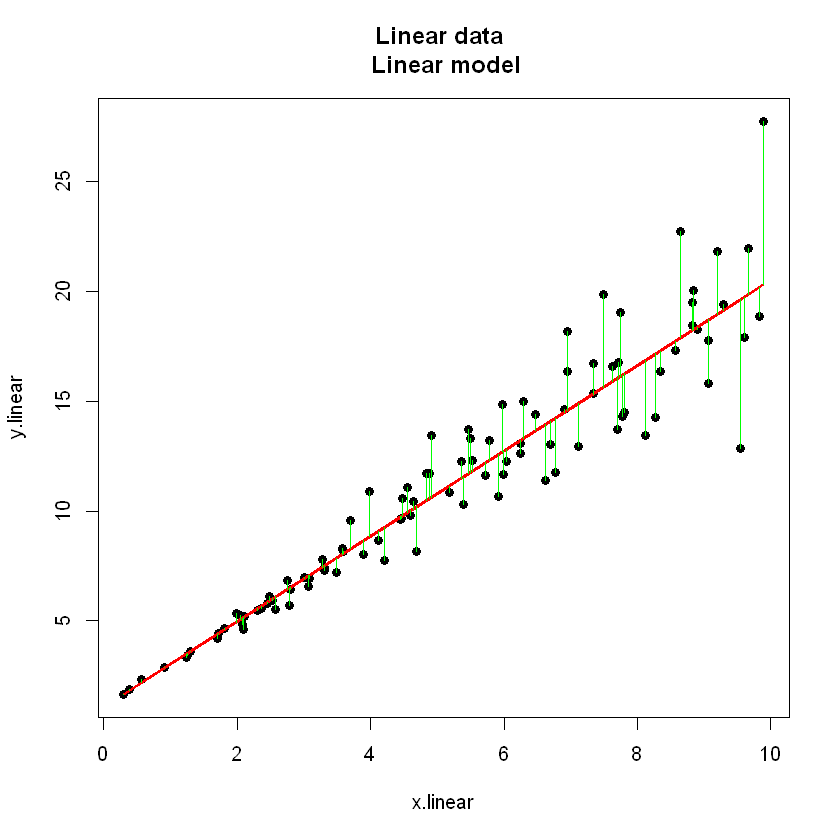

In [19]:
# Plot approximation
plot(x.linear, y.linear, pch = 19,
     main = paste('Linear data', "\n", "Linear model"))

lines(x.linear, y.hat.linear.2.params, col = "red", lwd = 2)

segments(x0 = x.linear, x1 = x.linear,
         y = y.linear, y1 = y.hat.linear.2.params,
         col = 'green')

# Save picture
linear.data.linear.model.approx <- recordPlot()

<font color='blue'>***4.- Repite el paso anterior con el mismo modelo pero usando la segunda función.***</font>
### Con los datos del apartado anterior que siguen una regla lineal, aproximamos con un modelo cuadrático de tres parámetros.
En el apartado anterior, habíamos generado unos datos que siguen una ley lineal y habíamos ajustado, también, con un modelo lineal con dos parámetros. Vamos a mantener ese modelo lineal pero, esta vez, vamos a ajustar con un modelo cuadrático con tres parámetros. El modelo lineal estaba guardado en `my_dist`. Ploteamos:

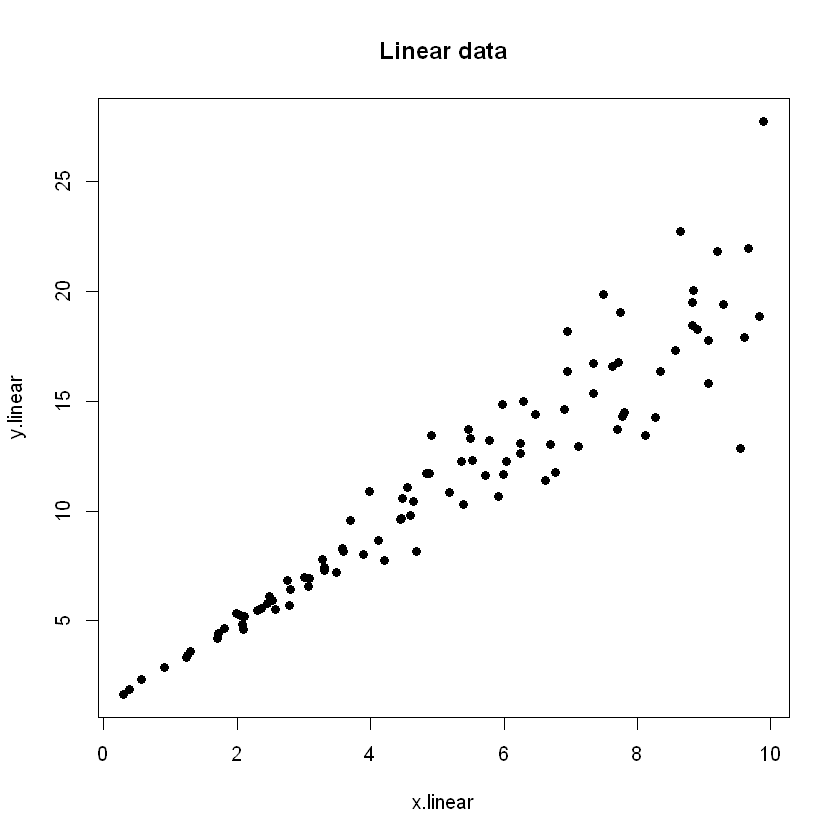

In [20]:
plot(x.linear, y.linear, pch = 19,
    main = "Linear data")

In [21]:
# Calculate \hat{\theta}, ie, parameters that optimize the likelihood function
# Set matrix for quadratic approximation
X.linear.3.params <- cbind(X.linear.2.params, x.linear^2)
theta.hat.linear.3.params <- opt_likelihood(X = X.linear.3.params, y = y.linear, sigma = sigma.linear)
# Display optimum parametres
print("Parámetros que optimizan la función de likelihood:")
theta.hat.linear.3.params

[1] "Parámetros que optimizan la función de likelihood:"


,1.14549502
x.linear,1.86907596
,0.01369036


In [22]:
# Compute predicted y values
y.hat.linear.3.params <- X.linear.3.params %*% theta.hat.linear.3.params

In [23]:
# Compute observed chi^2
chi.linear.3.params <- sum(((y.linear - y.hat.linear.3.params) / sigma.linear) ^ 2)
print(paste('Valor observado de chi-cuadrado:', chi.linear.3.params))

[1] "Valor observado de chi-cuadrado: 96.2866659468661"


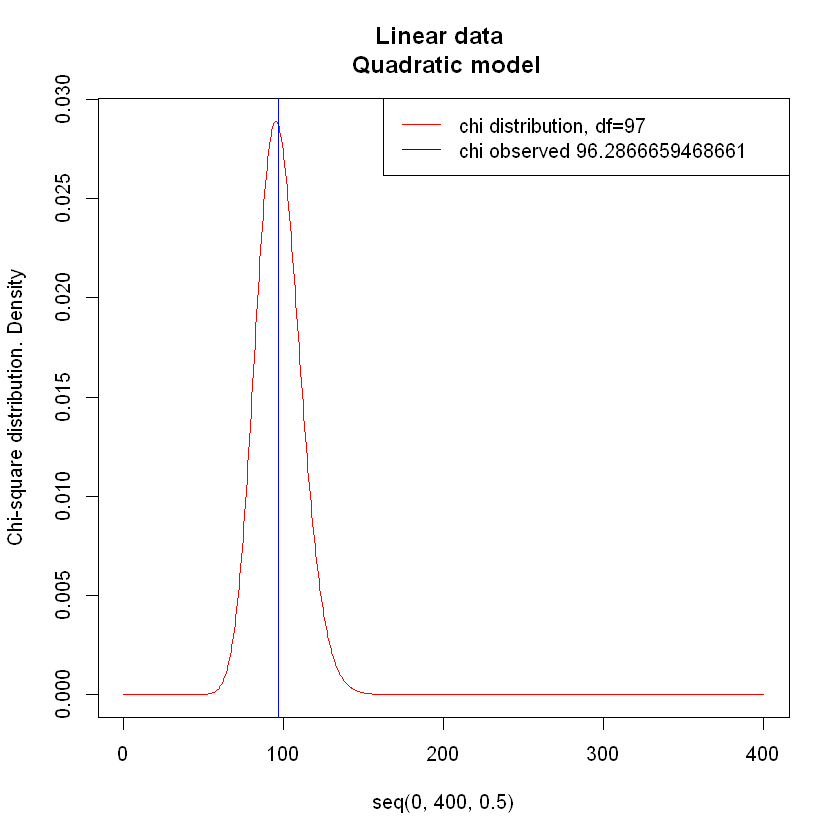

In [24]:
plot(seq(0, 400, 0.5), dchisq(seq(0, 400, 0.5),  N - length(theta.hat.linear.3.params)),
     ylab = 'Chi-square distribution. Density',
     type = "l",
     col = "red",
     main = paste("Linear data", "\n", "Quadratic model"))

abline(v = chi.linear.3.params, col = "blue")

legend("topright", legend = c(paste0("chi distribution, df=", N - length(theta.hat.linear.3.params)),
                              paste('chi observed', chi.linear.3.params)),
       col = c("red", "blue"),
       lty = 1, 
       cex = 1)

# Save picture
linear.data.quadratic.model <- recordPlot()

In [25]:
# Compute p-value
# pchisq: cumulative distributed function
#    df : degrees of freedom
p.linear.3.params <- 1 - pchisq(chi.linear.3.params,
                                df = N - length(theta.hat.linear.3.params))
print(paste('p-valor observado:', p.linear.3.params))

[1] "p-valor observado: 0.501365875712755"


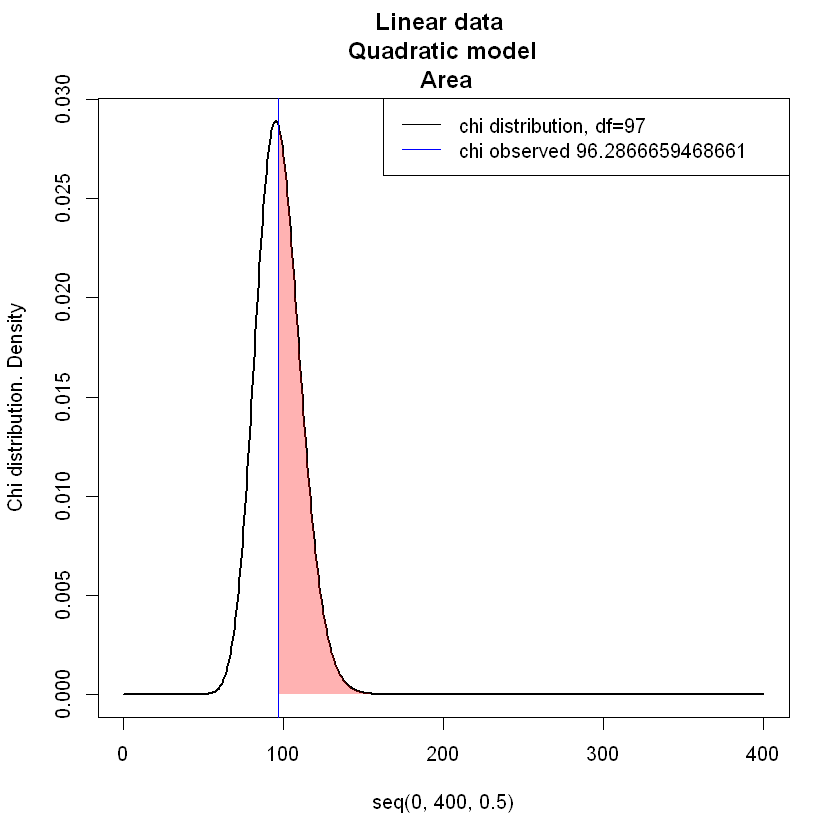

In [26]:
#create vector of x values
x <- seq(0, 400, 0.5)

#create density curve
plot(seq(0, 400, 0.5), dchisq(seq(0, 400, 0.5),  N - length(theta.hat.linear.3.params)),
    type = "l",
    main =  paste("Linear data", "\n", "Quadratic model", "\n", "Area"),
    ylab = 'Chi distribution. Density',
    lwd = 2)

x_vector <- seq(chi.linear.3.params, 400)

#create vector of chi-square density values
p_vector <- dchisq(x_vector, df =  N - length(theta.hat.linear.3.params))

#fill in portion of the density plot from 0 to 40
polygon(c(x_vector, rev(x_vector)), c(p_vector, rep(0, length(p_vector))),
        col = adjustcolor('red', alpha = 0.3),
        border = NA)

abline(v = chi.linear.3.params, col = "blue")

legend("topright", legend = c(paste0("chi distribution, df=",N - length(theta.hat.linear.3.params)),
                              paste('chi observed', chi.linear.3.params)),
       col = c("black", "blue"),
       lty = 1, 
       cex = 1)

# Save picture
linear.data.quadratic.model.area <- recordPlot()

Si llamamos $\alpha$ al valor obtenido en la celda anterior, decimos que rechazaremos $H_{0}$, es decir, el modelo cuadrático, con una confianza de:

In [27]:
alpha.linear.3.params <- p.linear.3.params
100*(1 - alpha.linear.3.params)

[1] 49.86341

Mostramos el ajuste:

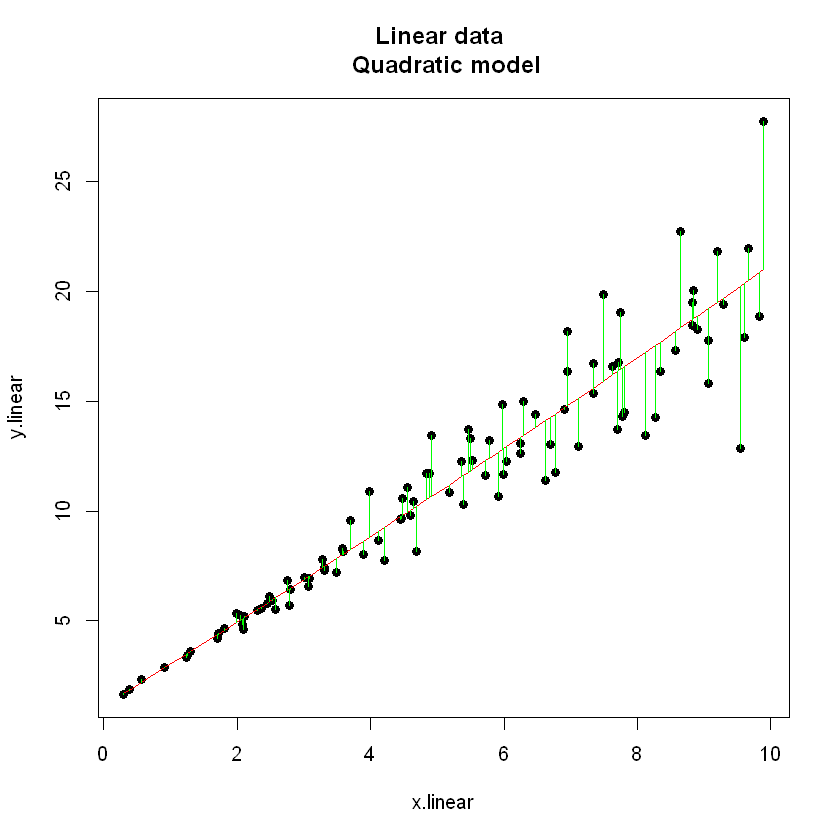

In [28]:
# Plot model
plot(x.linear, y.linear, pch = 19, 
     main = paste('Linear data', "\n", "Quadratic model"))

lines(sort(x.linear), y.hat.linear.3.params[order(x.linear)], col = "red", lwd = 1.5)

segments(x0 = x.linear, x1 = x.linear, 
         y = y.linear, y1 = y.hat.linear.3.params,
         col = 'green')

# Save picture
linear.data.quadratic.model.approx <- recordPlot()

**La comparación se realiza en el último apartado.**

### Veamos qué ocurriría ahora generando datos que siguen una ley cuadrática y aproximando por un modelo lineal (con 2 parámetros) y un modelo cuadrático (con 3 parámetros).

Generamos los datos que siguen la ley cuadrática:

In [29]:
a.quadratic <- 1
b.quadratic <- 2
c.quadratic <- 3
m.quadratic <- 0.1
n.quadratic <- 0.04

x.quadratic <- runif(n = N, min = 0, max = 10)

my.dist.2 <- dist_2(x = x.quadratic, 
                    a = a.quadratic,
                    b = b.quadratic,
                    c = c.quadratic,
                    m = m.quadratic,
                    n = n.quadratic)

In [30]:
# Set sigma
sigma.quadratic <- my.dist.2$sigma

In [31]:
# Set y
y.quadratic <- my.dist.2$y

**Aproximamos por un modelo cuadrático con 3 parámetros**

In [32]:
# Calculate \hat{\theta}
X.quadratic.3.params <- cbind(1, x.quadratic, x.quadratic^2)
theta.hat.quadratic.3.params <- opt_likelihood(X = X.quadratic.3.params,
                                               y = y.quadratic,
                                               sigma = sigma.quadratic)
theta.hat.quadratic.3.params

,0.9377568
x.quadratic,2.1316462
,2.9759191


In [33]:
# Compute predicted y values
y.hat.quadratic.3.param <- X.quadratic.3.params %*% theta.hat.quadratic.3.params

In [34]:
# ESTADÍSTICO DE CONTRASTE
# Compute observed chi^2
chi.quadratic.3.params <- sum(((y.quadratic - y.hat.quadratic.3.param) / sigma.quadratic) ^ 2)
print(paste('Valor observado de chi-cuadrado:', chi.quadratic.3.params))

[1] "Valor observado de chi-cuadrado: 101.929764663149"


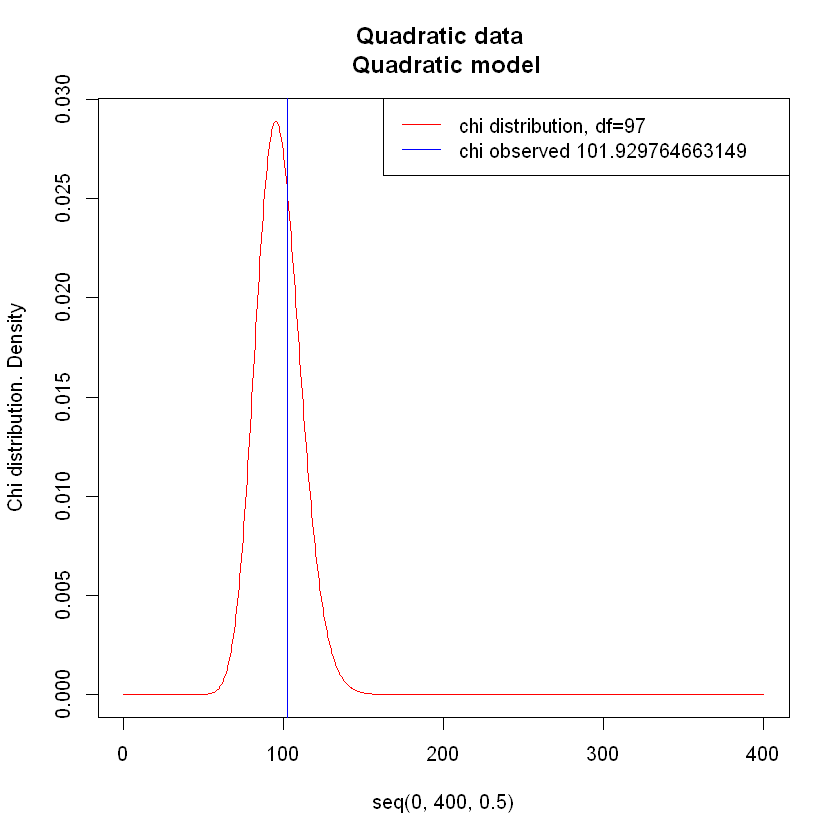

In [35]:
plot(seq(0, 400, 0.5),
     dchisq(seq(0, 400, 0.5),  N - length(theta.hat.quadratic.3.params)),
     ylab = 'Chi distribution. Density',
     type = "l",
     col = "red",
     main = paste('Quadratic data', "\n", "Quadratic model"))

abline(v = chi.quadratic.3.params,
       col = "blue")

legend("topright",
       legend = c(paste0("chi distribution, df=",N - length(theta.hat.quadratic.3.params)),
                  paste('chi observed', chi.quadratic.3.params)),
       col = c("red", "blue"),
       lty = 1, 
       cex = 1)

# Save picture
quadratic.data.quadratic.model <- recordPlot()

In [36]:
# Compute p-value
# pchisq: cumulative distributed function
#    df : degrees of freedom
p.quadratic.3.param <- 1 - pchisq(chi.quadratic.3.params, df = N - length(theta.hat.quadratic.3.params))
print(paste('p-valor observado:', p.quadratic.3.param))

[1] "p-valor observado: 0.346126104116454"


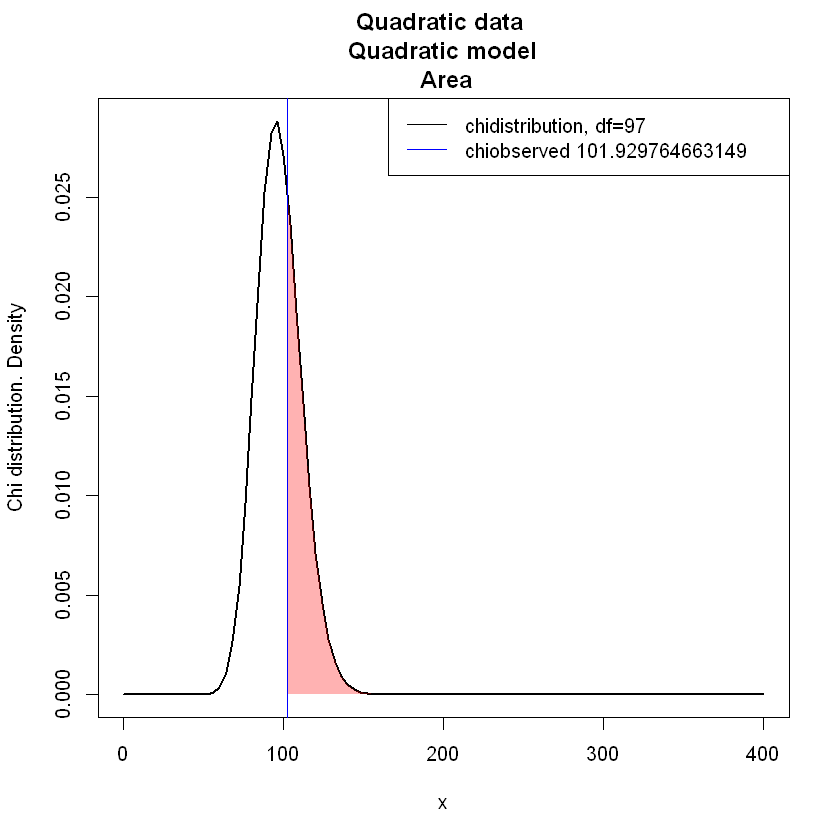

In [37]:
#create vector of x values
x <- seq(0, 400, 0.5)

#create density curve
curve(dchisq(x, df = N - length(theta.hat.quadratic.3.params)), from = 0, to = 400,
        main = paste('Quadratic data', "\n", "Quadratic model", "\n", "Area"),
        ylab = 'Chi distribution. Density',
        lwd = 2)

x_vector <- seq(chi.quadratic.3.params, 400)

#create vector of chi-square density values
p_vector <- dchisq(x_vector, df =  N - length(theta.hat.quadratic.3.params))

#fill in portion of the density plot from 0 to 40
polygon(c(x_vector, rev(x_vector)), c(p_vector, rep(0, length(p_vector))),
        col = adjustcolor('red', alpha = 0.3), border = NA)

abline(v = chi.quadratic.3.params, col = "blue")

legend("topright", legend = c(paste0("chidistribution, df=",N - length(theta.hat.quadratic.3.params)),
                              paste('chiobserved', chi.quadratic.3.params)),
       col = c("black", "blue"),
       lty = 1, 
       cex = 1)

# Save picture
quadratic.data.quadratic.model.area <- recordPlot()

Si llamamos $\alpha$ al valor obtenido en la celda anterior, decimos que rechazaremos $H_{0}$ con una confianza de:

In [38]:
alpha.quadratic.3.param <- p.quadratic.3.param
100*(1 - alpha.quadratic.3.param)

[1] 65.38739

Mostramos el ajuste:

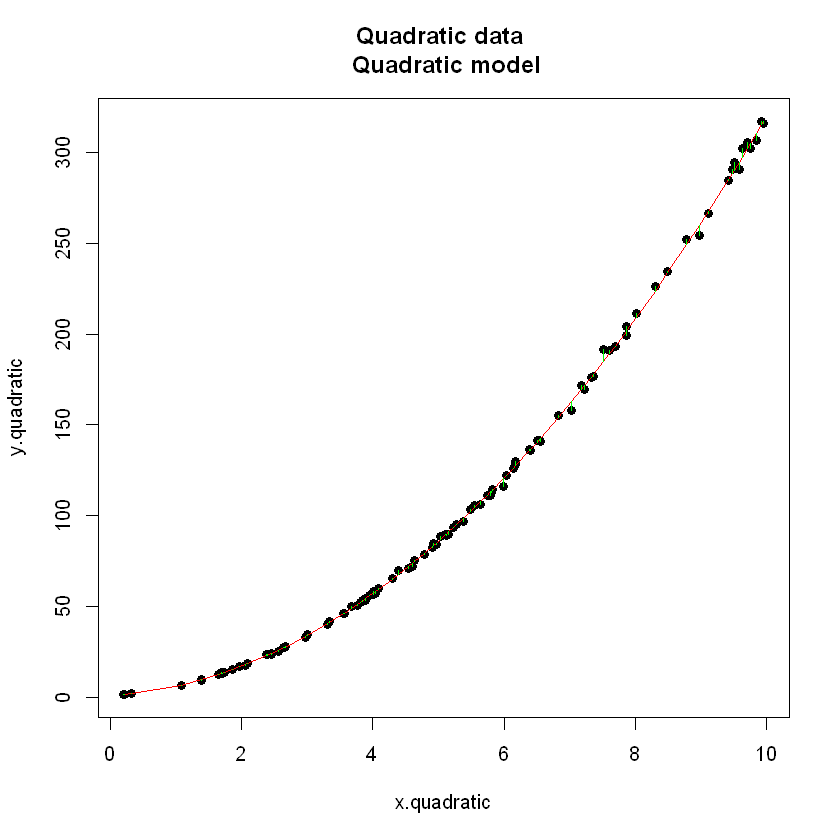

In [39]:
# Plot model
plot(x.quadratic, y.quadratic, pch = 19, 
     main = paste('Quadratic data', "\n", "Quadratic model"))

lines(sort(x.quadratic), y.hat.quadratic.3.param[order(x.quadratic)], col = "red", lwd = 1.5)

segments(x0 = x.quadratic, x1 = x.quadratic,
         y = y.quadratic, y1 = y.hat.quadratic.3.param,
         col = 'green')

**Aproximamos por un modelo lineal con 2 parámetros:**

In [40]:
# Calculate \hat{\theta}
X.quadratic.2.params <- cbind(1, x.quadratic)
theta.hat.quadratic.2.params <- opt_likelihood(X = X.quadratic.2.params,
                                               y = y.quadratic,
                                               sigma = sigma.quadratic)
theta.hat.quadratic.2.params

,-8.537801
x.quadratic,16.879806


In [41]:
# Compute predicted y values
y.hat.quadratic.2.param <- X.quadratic.2.params %*% theta.hat.quadratic.2.params

In [42]:
# Compute observed chi^2
chi.quadratic.2.params <- sum(((y.quadratic - y.hat.quadratic.2.param) / sigma.quadratic) ^ 2)
print(paste('Valor observado de chi-cuadrado:', chi.quadratic.2.params))

[1] "Valor observado de chi-cuadrado: 63707.7346366616"


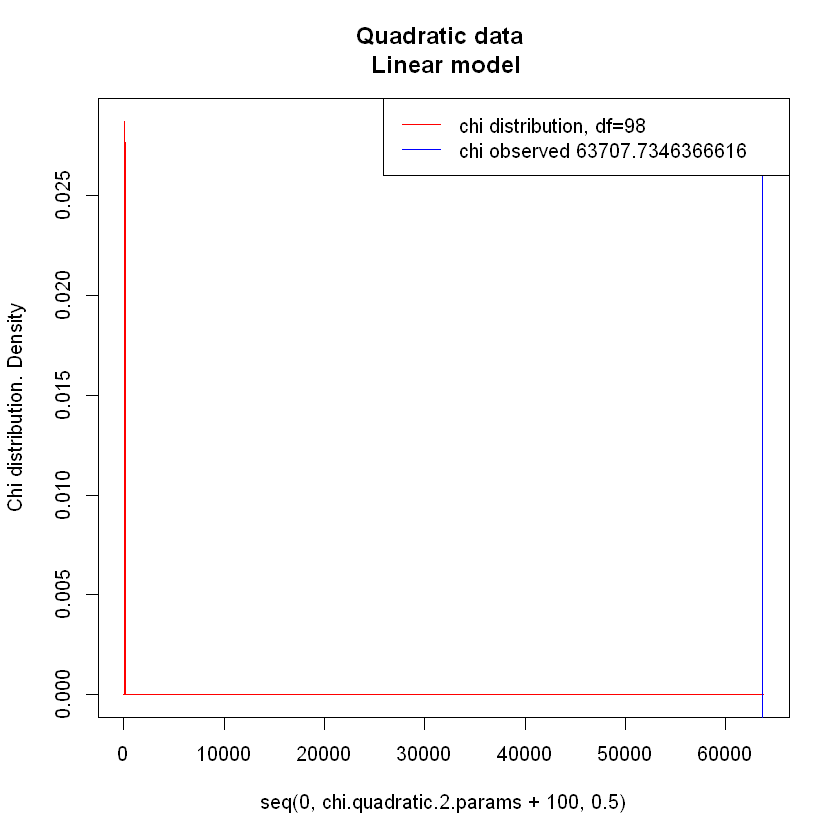

In [43]:
plot(seq(0, chi.quadratic.2.params + 100, 0.5),
     dchisq(seq(0,  chi.quadratic.2.params + 100, 0.5),  N - length(theta.hat.quadratic.2.params)),
     type = "l",
     col = "red",
     ylab = 'Chi distribution. Density',
     main = paste('Quadratic data', "\n", "Linear model"))

abline(v = chi.quadratic.2.params,
       col = "blue")

legend("topright",
       legend = c(paste0("chi distribution, df=",N - length(theta.hat.quadratic.2.params)),
                  paste('chi observed', chi.quadratic.2.params)),
       col = c("red", "blue"),
       lty = 1, 
       cex = 1)

# Save picture
quadratic.data.linear.model <- recordPlot()

In [44]:
# Compute p-value
# pchisq: cumulative distributed function
#    df : degrees of freedom
p.quadratic.2.param <- 1 - pchisq(chi.quadratic.2.params, df = N - length(theta.hat.quadratic.2.params))
print(paste('p-valor observado:', p.quadratic.2.param))

[1] "p-valor observado: 0"


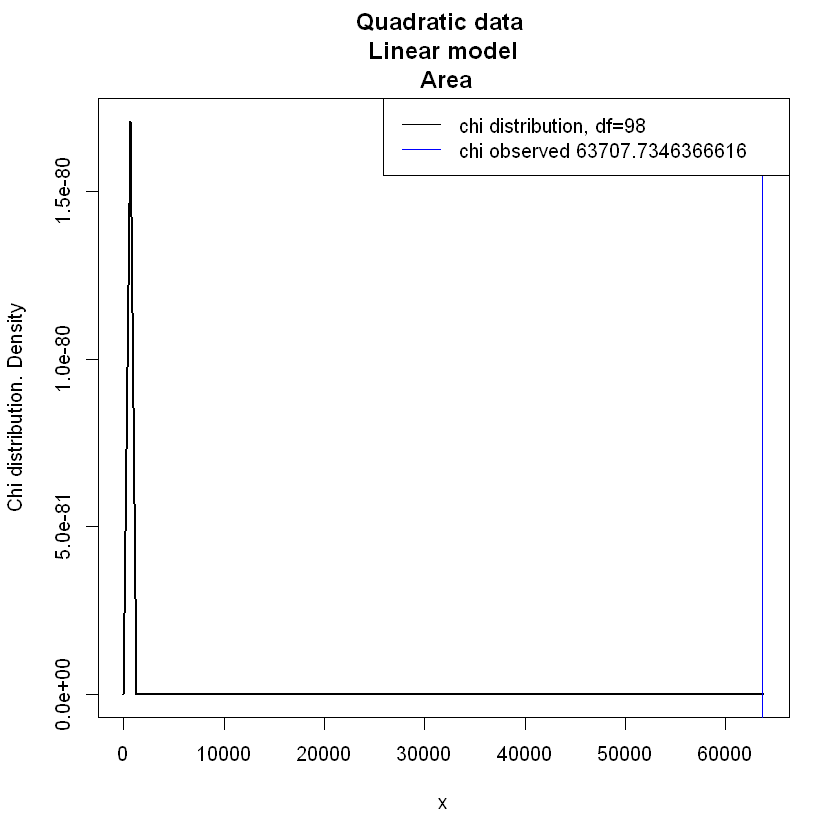

In [45]:
#create vector of x values
x <- seq(0, chi.quadratic.2.params + 100, 0.5)

#create density curve
curve(dchisq(x, df = N - length(theta.hat.quadratic.2.params)),
      from = 0, to = chi.quadratic.2.params + 100,
      main = paste('Quadratic data', "\n", "Linear model", "\n", "Area"),
      ylab = 'Chi distribution. Density',
      lwd = 2)

x_vector <- seq(chi.quadratic.2.params, chi.quadratic.2.params + 100)

#create vector of chi-square density values
p_vector <- dchisq(x_vector, df =  N - length(theta.hat.quadratic.2.params))

#fill in portion of the density plot from 0 to 40
polygon(c(x_vector, rev(x_vector)),
        c(p_vector, rep(0, length(p_vector))),
        col = adjustcolor('red', alpha = 0.3),
        border = NA)

abline(v = chi.quadratic.2.params, col = "blue")

legend("topright", legend = c(paste0("chi distribution, df=", N - length(theta.hat.quadratic.2.params)),
                              paste('chi observed', chi.quadratic.2.params)),
       col = c("black", "blue"),
       lty = 1, 
       cex = 1)

# Save picture
quadratic.data.linear.model.area <- recordPlot()

No hay ningún área rellena por la anomalía del valor.

Si llamamos $\alpha$ al valor obtenido en la celda anterior, decimos que rechazaremos $H_{0}$, es decir, el modelo lineal para datos generados con una rela cuadrática, con una confianza de:

In [46]:
alpha.quadratic.2.param <- p.quadratic.2.param
100*(1 - alpha.quadratic.2.param)

[1] 100

Mostramos el ajuste:

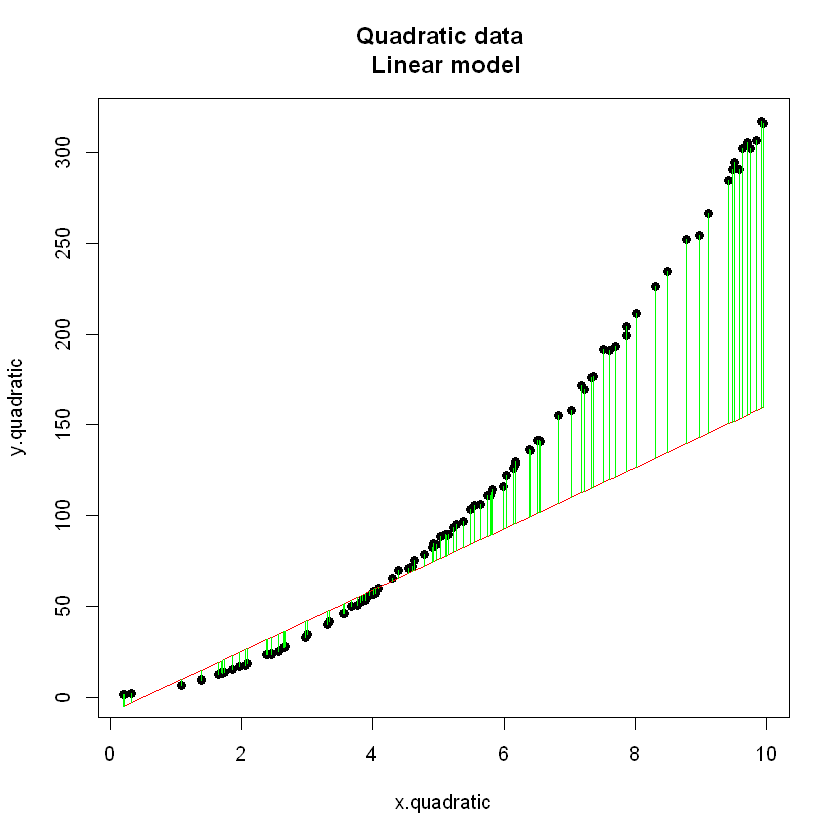

In [47]:
# Plot model
plot(x.quadratic, y.quadratic, pch = 19, 
     main = paste('Quadratic data', "\n", "Linear model"))

lines(sort(x.quadratic), y.hat.quadratic.2.param[order(x.quadratic)], col = "red", lwd = 1.5)

segments(x0 = x.quadratic, x1 = x.quadratic,
         y = y.quadratic, y1 = y.hat.quadratic.2.param, col = 'green')

# Save picture
quadratic.data.linear.model.approx <- recordPlot()

<font color='blue'>***5.- Usando la primera de las funciones anteriores con los valores dados en 3) calcula el valor del likelihood ratio “q” para un modelo con 2 y 3 parámetros. ¿Con qué confidence level podemos aceptar H0? Comenta el resultado: ¿qué modelo es mejor el primero o el segundo?.***</font>


Recordemos que la función de verosimilitud está dada por:
$$ L((x_{i}, y_{i}); \theta) = \prod_{i} p(y_{i}|x_{i})$$
donde:
$$ p(y_{i}|x_{i}) = \prod_{i}\frac{1}{\sigma_{i}\sqrt{2\pi}}e^{-\frac{1}{2}
\frac{(y_{i}-\boldsymbol{x}_{i}{\boldsymbol{\theta})^{2}}}{\sigma{i}^{2}}}.$$


Aplicando logaritmo a la función de verosimilitud, obtenemos:
$$
-2\log(L) = -2\log\left( \prod_{i}\frac{1}{\sigma_{i}\sqrt{2\pi}}e^{-\frac{1}{2}
\frac{(y_{i}-\boldsymbol{x}_{i}{\boldsymbol{\theta})^{2}}}{\sigma{i}^{2}}} \right) \\
= -2 \sum_{i}\log\left(\frac{1}{\sigma_{i}\sqrt{2\pi}}e^{-\frac{1}{2}
\frac{(y_{i}-\boldsymbol{x}_{i}{\boldsymbol{\theta})^{2}}}{\sigma{i}^{2}}} \right) \\
= -2 \sum_{i}\left(-\frac{1}{2}\frac{(y_{i}-\boldsymbol{x_{i}}\boldsymbol{\theta})^{2}}{\sigma_{i}^{2}} - \log(\sigma_{i}) - \log(\sqrt{2\pi}) \right) \\
= \sum_{i}\frac{(y_{i}-\boldsymbol{x_{i}}\boldsymbol{\theta})^{2}}{\sigma_{i}^{2}} +2\sum_{i}\log(\sigma_{i}) + 2N\log(\sqrt{2\pi}).
$$


Queremos hallar:

$$ q = -2\log\left(\frac{L(H_{0})}{L(H_{1})}\right)=-2\log(L(H_{0}))+2\log(L(H_{1})) $$

Donde 
* $H_{0}:$ asume que el modelo con menos parámetros es el correcto.
* $H_{1}:$ asume que el modelo con más parámetros es el correcto.

### **En primer lugar, realizamos el cálculo para los datos generados según la regla lineal**.

La hipótesis nula afirma que el modelo con menos parámetros (2) es el correcto. La hipótesis alternativa afirma que el modelo con más parámetros (3) es el correcto. 

Empleemos que el primer factor de esa suma no es otro que el chi-cuadrado observado. Para el modelo de 2 parámetros es `chi.linear.2.params`; para el modelo de 3 parámetros es `chi.linear.3.params`.

Podríamos aplicar la fórmula de $-2\log(L)$ tal cual:

In [48]:
# l.h0.linear <- chi.linear.2.params + 2*log(sum(sigma.linear)) + 2*N*log(sqrt(2*pi))
# l.h0.linear

In [49]:
# l.h1.linear <- chi.linear.3.params + 2*log(sum(sigma.linear)) + 2*N*log(sqrt(2*pi))
# l.h1.linear

In [50]:
# q.linear = l.h0.linear - l.h1.linear
# q.linear

o simplemente, cancelando factores:

In [51]:
q.linear = chi.linear.2.params - chi.linear.3.params
q.linear

[1] 1.252218

Tenemos que se distribuye como una $\chi^{2}_{k=1}$ donde $k=3-2=1$ son su grados de libertad.

In [52]:
# Compute p-value
# pchisq: cumulative distributed function
#    df : degrees of freedom
p.q.linear <- 1 - pchisq(q.linear, df = 1)
print(paste('p-valor observado:', p.q.linear))

[1] "p-valor observado: 0.263129305406641"


Si llamamos $\alpha$ al valor obtenido en la celda anterior, decimos que rechazaremos $H_{0}$, con una confianza de:

In [53]:
alpha.p.q.linear <- p.q.linear
100*(1 - alpha.p.q.linear)

[1] 73.68707

Esto nos dice que seguramente sea mejor el modelo cuadrático para aproximar los datos generados con la regla lineal. Pero sería un poco matar moscas a cañonazos. Comparemos las aproximaciones en un mismo gráfico:

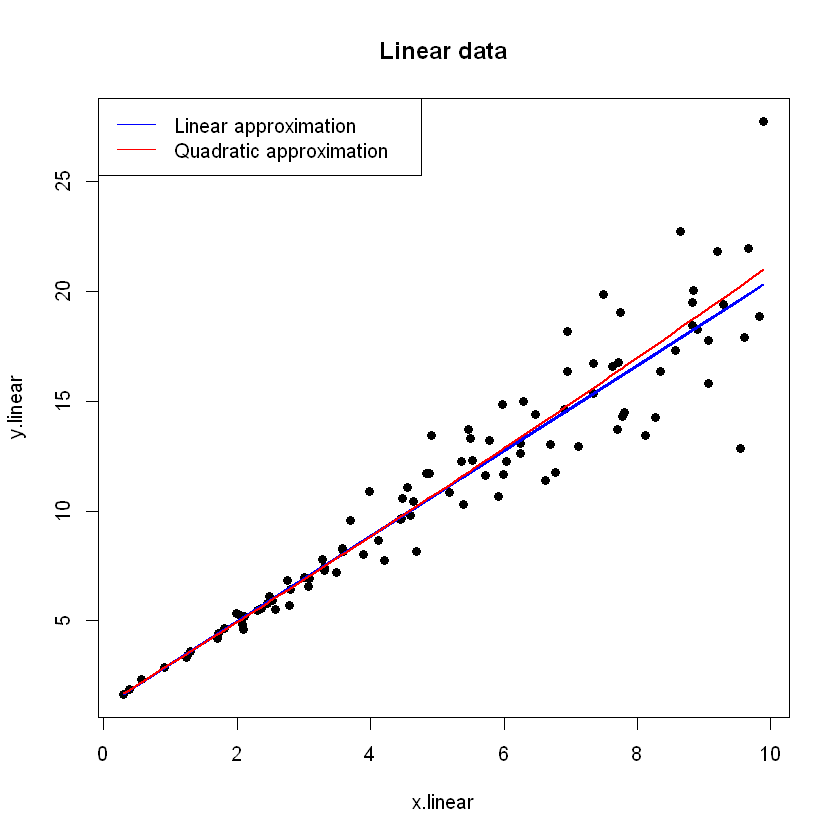

In [54]:
# Plot model
plot(x.linear, y.linear, pch = 19, 
     main = 'Linear data')

lines(x.linear, y.hat.linear.2.params, col = "blue", lwd = 2)

lines(sort(x.linear), y.hat.linear.3.params[order(x.linear)], col = "red", lwd = 2)

legend("topleft",
       legend = c("Linear approximation", "Quadratic approximation"),
       col = c("blue", "red"),
       lty = 1, 
       cex = 1)


### **En segundo lugar, realizamos el cálculo para los datos generados según la regla cuadrática**.

La hipótesis nula afirma que el modelo con menos parámetros (2) es el correcto. La hipótesis alternativa afirma que el modelo con más parámetros (3) es el correcto. 

Empleemos que el primer factor de esa suma no es otro que el chi-cuadrado observado. Para el modelo de 2 parámetros es `chi.quadratic.2.params`; para el modelo de 3 parámetros es `chi.quadratic.3.params`.

Podríamos aplicar la fórmula tal cual:

In [55]:
# l.h0.quadratic <- chi.quadratic.2.params + 2*log(sum(sigma.quadratic)) + 2*N*log(sqrt(2*pi))
# l.h0.quadratic

In [56]:
# l.h1.quadratic <- chi.quadratic.3.params + 2*log(sum(sigma.quadratic)) + 2*N*log(sqrt(2*pi))
# l.h1.quadratic

In [57]:
# q.quadratic = l.h0.quadratic - l.h1.quadratic
# q.quadratic

o simplemente, cancelando factores:

In [58]:
q.quadratic = chi.quadratic.2.params - chi.quadratic.3.params
q.quadratic

[1] 63605.8

In [59]:
# Compute p-value
# pchisq: cumulative distributed function
#    df : degrees of freedom
p.q.cuadratic <- 1 - pchisq(q.quadratic, df = 1)
print(paste('p-valor observado:', p.q.cuadratic))

[1] "p-valor observado: 0"


Si llamamos $\alpha$ al valor obtenido en la celda anterior, decimos que rechazaremos $H_{0}$, con una confianza de:

In [60]:
alpha.p.q.quadratic <- p.q.cuadratic
100*(1 - alpha.p.q.quadratic)

[1] 100

Es decir, como esperábamos, nos confirma que no es una buena idea aproximar datos que siguen una regla cuadrática con un modelo lineal. Nos dice que no aceptemos $H_{0}$, es decir, que no aceptemos el modelo lineal con dos parámetros como aproximación. COmparemos en un mismo gráfico:

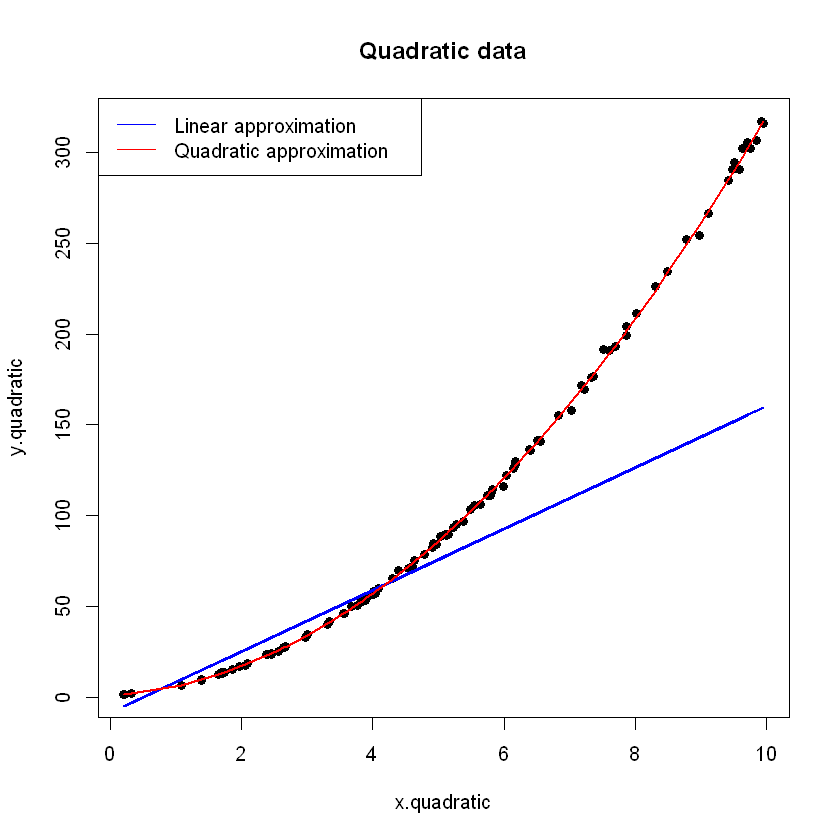

In [61]:
# Plot model
plot(x.quadratic, y.quadratic, pch = 19, 
     main = 'Quadratic data')

lines(x.quadratic, y.hat.quadratic.2.param, col = "blue", lwd = 2)

lines(sort(x.quadratic), y.hat.quadratic.3.param[order(x.quadratic)], col = "red", lwd = 2)

legend("topleft",
       legend = c("Linear approximation", "Quadratic approximation"),
       col = c("blue", "red"),
       lty = 1, 
       cex = 1)
